Table des Matières

1. Importation des Bibliothèques

2. Chargement et Prétraitement des Données  
   a. Chargement des données  
   b. Vérification des valeurs manquantes  
   c. Nettoyage des données  
   d. Encodage des colonnes catégoriques  
   e. Standardisation des colonnes numériques  

3. Exploration des Données  
   a. Statistiques descriptives  
   b. Distribution des catégories d'attaque  
   c. Distribution des attaques spécifiques  
   d. Matrice de corrélation  

4. Préparation des Données pour les Modèles  

5. Entraînement des Modèles  
   a. Random Forest  
   b. Régression Logistique  
   c. Réseau de Neurones  

6. Évaluation des Modèles  
   a. Fonction d'évaluation  
   b. Évaluation du modèle Random Forest  
   c. Évaluation du modèle de Régression Logistique  
   d. Évaluation du modèle de Réseau de Neurones

7. Gestion d anomalie   


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [9]:
df = pd.read_csv('/content/Cybersecurity_attacks.csv')
print(df.isnull().sum())


Attack category          0
Attack subcategory     268
Protocol                 0
Source IP                0
Source Port              0
Destination IP           0
Destination Port         0
Attack Name              0
Attack Reference      2493
.                        1
Time                     1
dtype: int64


2. Chargement et Prétraitement des Données

In [10]:
df = df.head(30000)
# Suppression des lignes avec des valeurs manquantes dans 'Attack subcategory' et 'Attack Reference'
df.dropna(subset=['Attack subcategory', 'Attack Reference'], inplace=True)

# Remplissage des valeurs manquantes avec une valeur par défaut (par exemple 'Unknown') pour 'Attack subcategory' si vous ne voulez pas les supprimer
df['Attack subcategory'].fillna('Unknown', inplace=True)


<ipython-input-10-2c57b459bb1b>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attack subcategory'].fillna('Unknown', inplace=True)


In [11]:
# Encodage des colonnes catégoriques avec LabelEncoder
label_encoder = LabelEncoder()
df['Attack category'] = label_encoder.fit_transform(df['Attack category'])
df['Attack subcategory'] = label_encoder.fit_transform(df['Attack subcategory'])
df['Protocol'] = label_encoder.fit_transform(df['Protocol'])


In [12]:
# Standardisation des colonnes numériques (Source Port et Destination Port)
scaler = StandardScaler()
df[['Source Port', 'Destination Port']] = scaler.fit_transform(df[['Source Port', 'Destination Port']])


In [13]:
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time
0,8,72,111,175.45.176.0,-0.563963,149.171.126.16,-0.225057,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416
1,6,133,117,175.45.176.3,-0.210614,149.171.126.18,3.092944,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415
2,6,50,111,175.45.176.2,-0.115634,149.171.126.16,-0.225057,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416
3,6,93,111,175.45.176.2,-0.541353,149.171.126.16,0.330480,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417
4,6,55,111,175.45.176.2,0.043793,149.171.126.10,-0.225057,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418


3. Exploration des Données

In [14]:
print(df.describe())


       Attack category  Attack subcategory      Protocol   Source Port  \
count     18242.000000        18242.000000  18242.000000  1.824200e+04   
mean          4.908234           67.399572     98.964642  4.985718e-17   
std           2.767337           41.021853     32.384166  1.000027e+00   
min           0.000000            0.000000      0.000000 -1.155206e+00   
25%           5.000000           34.000000    111.000000 -1.108785e+00   
50%           6.000000           59.000000    111.000000 -1.322136e-01   
75%           7.000000          101.000000    111.000000  9.562058e-01   
max          10.000000          141.000000    130.000000  1.761622e+00   

       Destination Port  
count      1.824200e+04  
mean       2.804466e-17  
std        1.000027e+00  
min       -2.331744e-01  
25%       -2.306377e-01  
50%       -2.250569e-01  
75%       -2.150116e-01  
max        6.416525e+00  


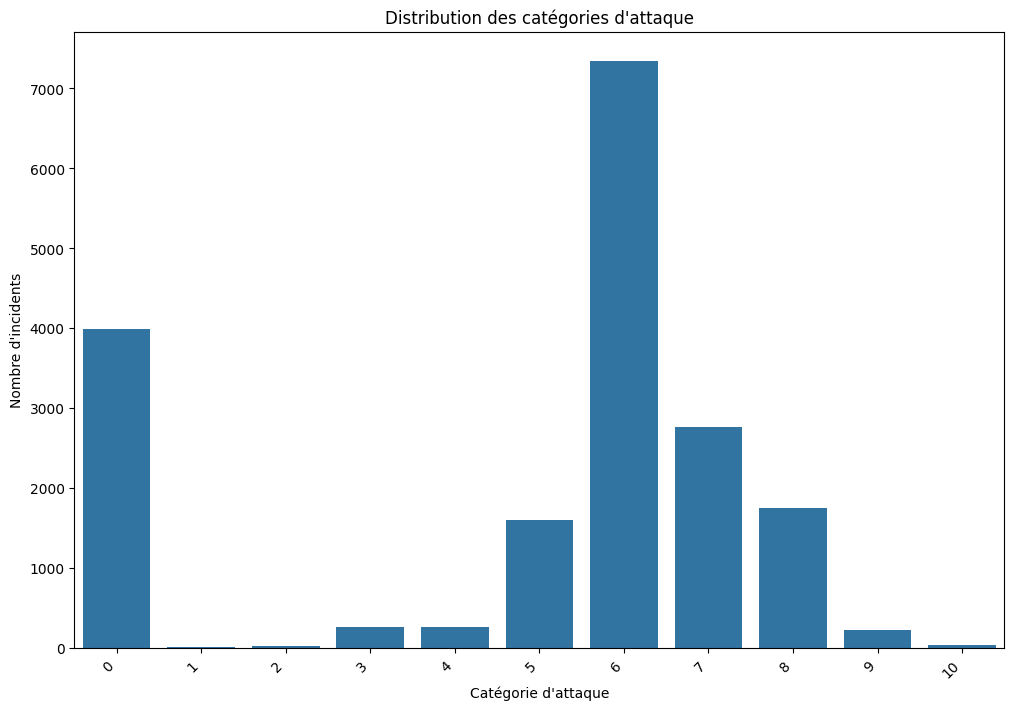

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un graphique de distribution des catégories d'attaque
plt.figure(figsize=(12, 8))

# Utiliser 'Attack category' pour l'axe x
sns.countplot(data=df, x='Attack category')

# Ajouter un titre et ajuster les labels
plt.title("Distribution des catégories d'attaque")
plt.xlabel("Catégorie d'attaque")
plt.ylabel("Nombre d'incidents")

plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.show()


Category 0 - Attacks:
 - Fuzzer: OSPF Database Description Packet: Basic (https://strikecenter.bpointsys.com/bps/strikes/fuzzers/ospf/dbd_basic.xml)
 - Fuzzer: HTTP GET Request Invalid URI (https://strikecenter.bpointsys.com/bps/strikes/fuzzers/http/get_invaliduri.xml)
 - Fuzzer: HTTP GET Request Invalid URI (https://strikecenter.bpointsys.com/bps/strikes/fuzzers/http/get_invaliduri.xml)
 - Fuzzer: HTTP GET Request Invalid URI (https://strikecenter.bpointsys.com/bps/strikes/fuzzers/http/get_invaliduri.xml)
 - Fuzzer: HTTP GET Request Invalid URI (https://strikecenter.bpointsys.com/bps/strikes/fuzzers/http/get_invaliduri.xml)
 - Fuzzer: HTTP GET Request Invalid URI (https://strikecenter.bpointsys.com/bps/strikes/fuzzers/http/get_invaliduri.xml)
 - Fuzzer: HTTP GET Request Invalid URI (https://strikecenter.bpointsys.com/bps/strikes/fuzzers/http/get_invaliduri.xml)
 - Fuzzer: HTTP GET Request Invalid URI (https://strikecenter.bpointsys.com/bps/strikes/fuzzers/http/get_invaliduri.xml)
 - F

<ipython-input-16-e40d1610aa85>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='Attack category', palette="Set2")


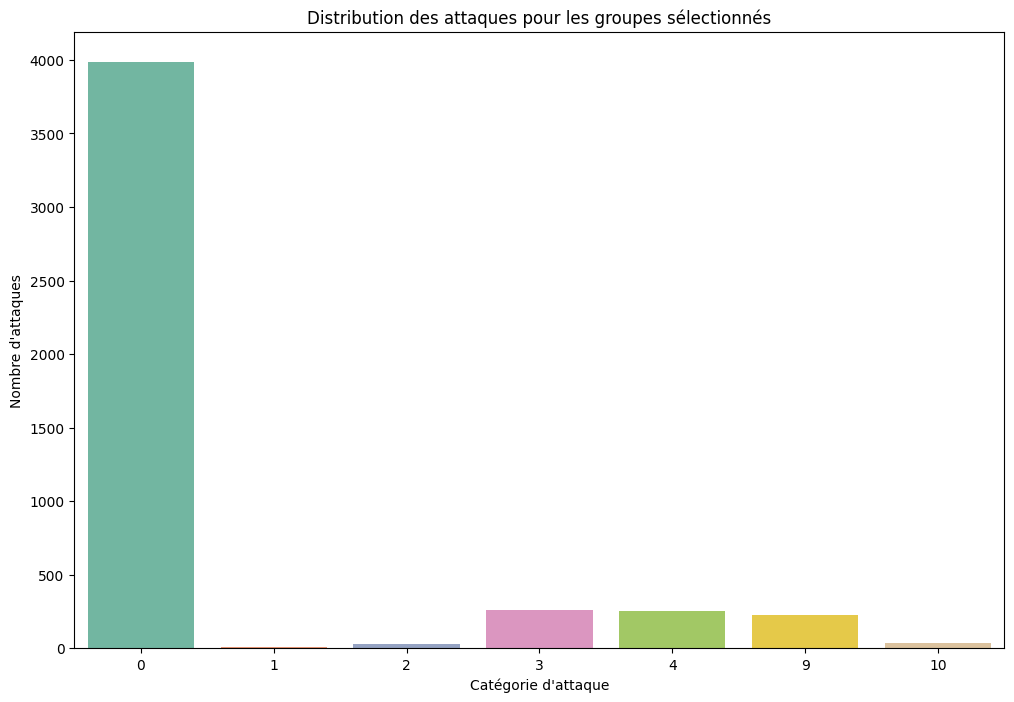

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner les groupes d'attaque spécifiques
attack_groups = [0, 1, 2, 3, 4, 9, 10]
filtered_df = df[df['Attack category'].isin(attack_groups)]

# Grouper par catégorie d'attaque et lister les attaques
attack_by_category = filtered_df.groupby('Attack category')['Attack Name'].apply(list).reset_index()

# Affichage des attaques pour chaque groupe
for index, row in attack_by_category.iterrows():
    print(f"Category {row['Attack category']} - Attacks:")
    for attack in row['Attack Name']:
        print(f" - {attack}")
    print("\n")

# Affichage des graphiques pour chaque catégorie d'attaque
plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_df, x='Attack category', palette="Set2")
plt.title('Distribution des attaques pour les groupes sélectionnés')
plt.xlabel('Catégorie d\'attaque')
plt.ylabel('Nombre d\'attaques')
plt.show()


In [17]:
# Sélectionner uniquement les colonnes numériques pour la corrélation
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Calculer la matrice de corrélation pour ces colonnes
corr_matrix = df[numeric_columns].corr()

# Afficher la matrice de corrélation sous forme de tableau
print("Matrice de Corrélation :\n", corr_matrix)


Matrice de Corrélation :
                     Attack category  Attack subcategory  Protocol  \
Attack category            1.000000           -0.020069 -0.011335   
Attack subcategory        -0.020069            1.000000 -0.051824   
Protocol                  -0.011335           -0.051824  1.000000   
Source Port               -0.028712           -0.032298  0.226134   
Destination Port           0.110806           -0.010191  0.038725   

                    Source Port  Destination Port  
Attack category       -0.028712          0.110806  
Attack subcategory    -0.032298         -0.010191  
Protocol               0.226134          0.038725  
Source Port            1.000000          0.074999  
Destination Port       0.074999          1.000000  


4. Préparation des Données pour les Modèles

In [18]:
# Définir les caractéristiques (features) et la cible (target)
X = df.drop(columns=['Attack category', 'Attack Name', 'Attack Reference', 'Source IP', 'Destination IP', '.', 'Time'])
y = df['Attack category']

# Division des données en ensembles d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head()


,Attack subcategory,Protocol,Source Port,Destination Port
0,72,111,-0.563963,-0.225057
1,133,117,-0.210614,3.092944
2,50,111,-0.115634,-0.225057
3,93,111,-0.541353,0.330480
4,55,111,0.043793,-0.225057


5. Entraînement des Modèles


Random Forest :

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Initialiser et entraîner le modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500, random_state=42)

Régression Logistique :

In [20]:
from sklearn.linear_model import LogisticRegression

# Initialiser et entraîner le modèle de régression logistique
lr_model = LogisticRegression(max_iter=50000, random_state=42, solver='lbfgs')
lr_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=50000, random_state=42)

*Réseau* de Neurones :

In [21]:
from sklearn.neural_network import MLPClassifier

# Initialiser et entraîner le modèle de réseau de neurones
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=5000, random_state=42)
nn_model.fit(X_train, y_train)


MLPClassifier(max_iter=5000, random_state=42)

6. Évaluation des Modèles

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

# Fonction pour évaluer un modèle avec graphiques
def evaluate_model(model, X_test, y_test):
    # Prédictions du modèle
    y_pred = model.predict(X_test)

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Affichage des scores
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Recall:", recall)
    print("Precision:", precision)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Affichage des graphiques

    # Graphique de la matrice de confusion
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title('Matrice de Confusion')
    plt.xlabel('Prédictions')
    plt.ylabel('Réel')
    plt.show()

    # Graphique des scores
    metrics = ['Accuracy', 'F1 Score', 'Recall', 'Precision']
    scores = [accuracy, f1, recall, precision]

    plt.figure(figsize=(8, 6))
    sns.barplot(x=metrics, y=scores, palette="Blues_d")
    plt.title('Scores du Modèle')
    plt.ylabel('Score')
    plt.xlabel('Métrique')
    plt.show()




Random Forest Model Evaluation


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Accuracy: 0.9114825979720471
F1 Score: 0.9075401846705216
Recall: 0.9114825979720471
Precision: 0.9050756068660938

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       820
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         8
           3       1.00      1.00      1.00        53
           4       0.98      0.96      0.97        45
           5       0.62      0.51      0.56       306
           6       0.90      0.94      0.92      1474
           7       0.98      0.98      0.98       570
           8       0.92      0.91      0.92       331
           9       0.77      0.97      0.86        34
          10       0.67      0.80      0.73         5

    accuracy                           0.91      3649
   macro avg       0.71      0.73      0.72      3649
weighted avg       0.91      0.91      0.91      3649



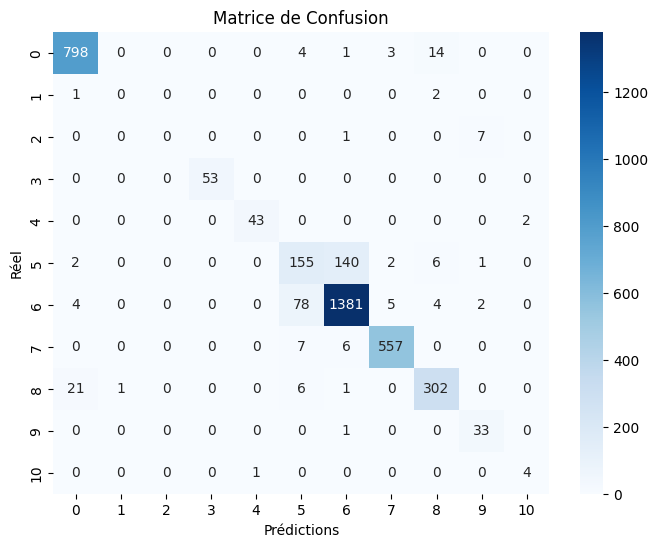

<ipython-input-22-249258d8e1b1>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette="Blues_d")


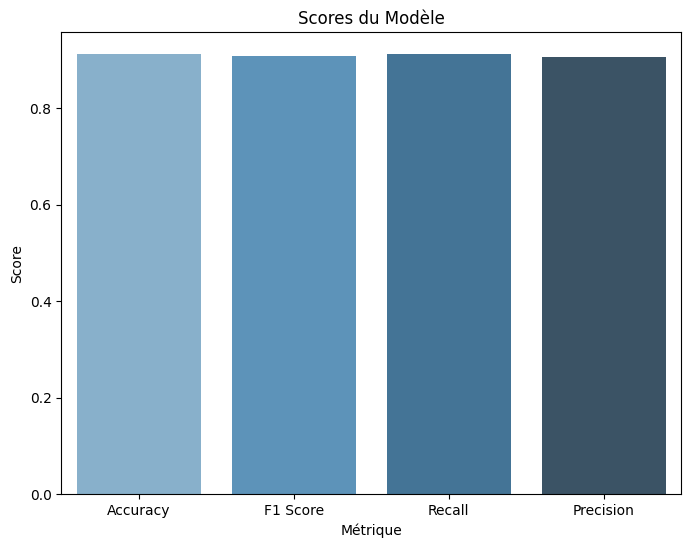

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Logistic Regression Model Evaluation
Accuracy: 0.510002740476843
F1 Score: 0.3905889056032991
Recall: 0.510002740476843
Precision: 0.39381655956034956

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.00      0.00       820
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        53
           4       0.92      1.00      0.96        45
           5       0.00      0.00      0.00       306
           6       0.47      0.87      0.61      1474
           7       0.64      0.88      0.74       570
           8       0.34      0.11      0.16       331
           9       0.50      0.03      0.06        34
          10       0.00      0.00      0.00         5

    accuracy                           0.51      3649
   macro avg       0.28      0.26      0.23      3649
weighted avg       0.39      0.51      0.39      3649



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


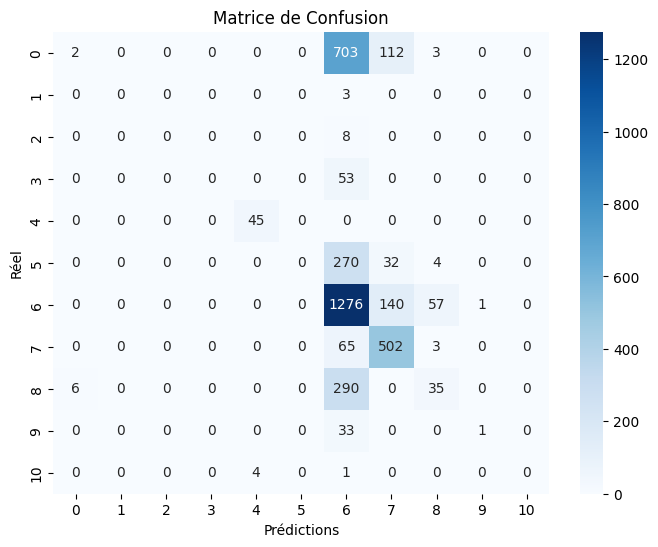

<ipython-input-22-249258d8e1b1>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette="Blues_d")


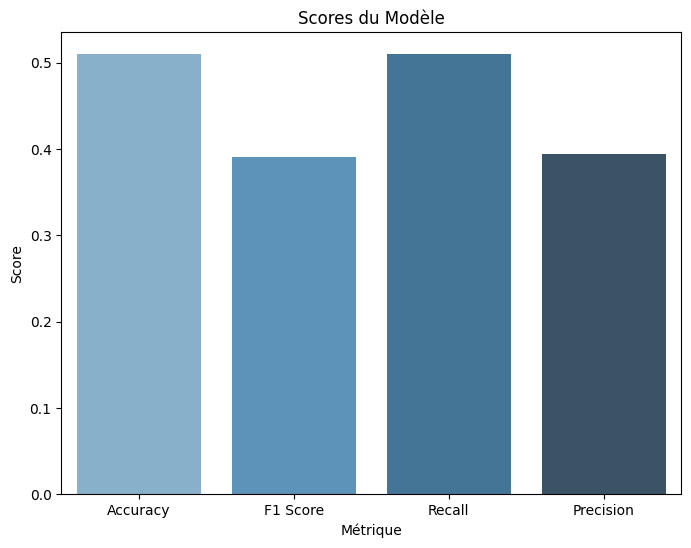


Neural Network Model Evaluation
Accuracy: 0.7766511372978898
F1 Score: 0.7496986860133067
Recall: 0.7766511372978898
Precision: 0.7711703382970065

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.67      0.77       820
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        53
           4       1.00      0.93      0.97        45
           5       0.52      0.10      0.16       306
           6       0.74      0.92      0.82      1474
           7       0.99      0.90      0.94       570
           8       0.58      0.94      0.72       331
           9       0.82      0.68      0.74        34
          10       0.57      0.80      0.67         5

    accuracy                           0.78      3649
   macro avg       0.56      0.54      0.53      3649
weighted avg       0.77      0.78      0.75      3649



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

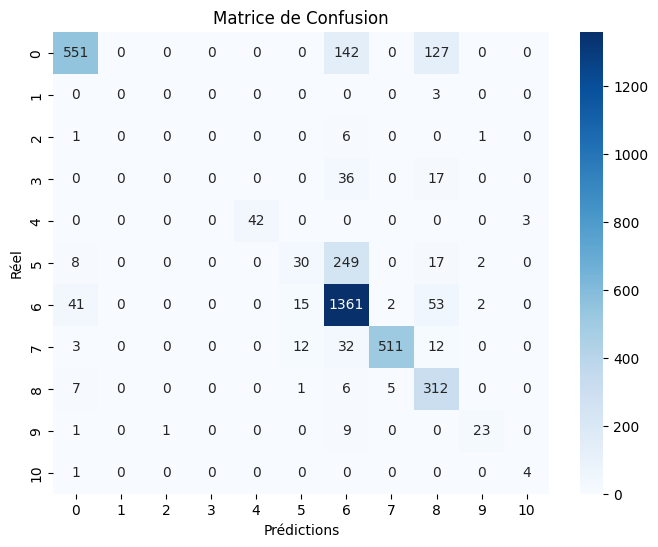

<ipython-input-22-249258d8e1b1>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette="Blues_d")


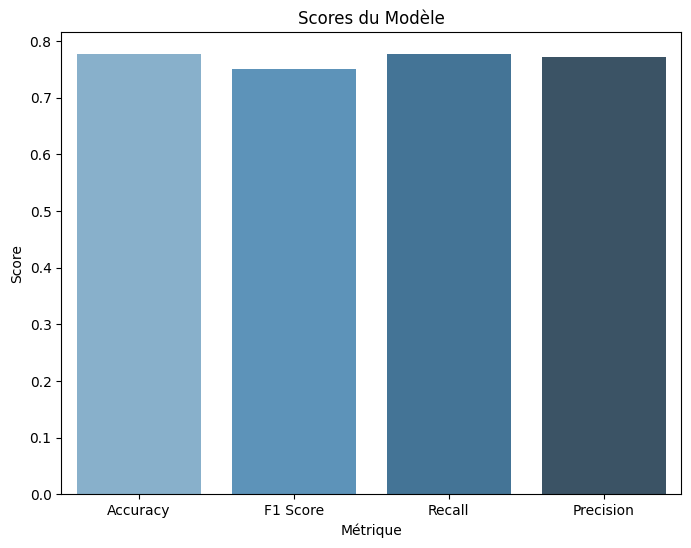

In [23]:
print("Random Forest Model Evaluation")
evaluate_model(rf_model, X_test, y_test)

print("\nLogistic Regression Model Evaluation")
evaluate_model(lr_model, X_test, y_test)

print("\nNeural Network Model Evaluation")
evaluate_model(nn_model, X_test, y_test)

In [24]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc
# from sklearn.preprocessing import label_binarize
# import numpy as np

# # Vérification des classes dans y_test
# print(f"Classes dans y_test : {np.unique(y_test)}")

# # Supposons que vos classes sont [0, 1, 2, ..., n-1]
# # Et y_test contient les labels de test
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Crée une matrice binaire selon les classes

# print(f"Shape de y_test_bin : {y_test_bin.shape}")
# print(f"Shape de rf_proba : {rf_proba.shape}")

# # Prédictions de probabilité pour chaque modèle (pour courbe ROC)
# rf_proba = rf_model.predict_proba(X_test)  # Random Forest
# lr_proba = lr_model.predict_proba(X_test)  # Logistic Regression
# nn_proba = nn_model.predict_proba(X_test)  # Neural Network

# # Calcul des courbes ROC pour chaque modèle et chaque classe
# plt.figure(figsize=(8, 6))

# # Random Forest ROC curve (One-vs-Rest)
# for i in range(rf_proba.shape[1]):
#     fpr, tpr, _ = roc_curve(y_test_bin[:, i], rf_proba[:, i])
#     auc_score = auc(fpr, tpr)
#     plt.plot(fpr, tpr, label=f'RF Class {i} (AUC = {auc_score:.2f})')

# # Logistic Regression ROC curve (One-vs-Rest)
# for i in range(lr_proba.shape[1]):
#     fpr, tpr, _ = roc_curve(y_test_bin[:, i], lr_proba[:, i])
#     auc_score = auc(fpr, tpr)
#     plt.plot(fpr, tpr, label=f'LR Class {i} (AUC = {auc_score:.2f})')

# # Neural Network ROC curve (One-vs-Rest)
# for i in range(nn_proba.shape[1]):
#     fpr, tpr, _ = roc_curve(y_test_bin[:, i], nn_proba[:, i])
#     auc_score = auc(fpr, tpr)
#     plt.plot(fpr, tpr, label=f'NN Class {i} (AUC = {auc_score:.2f})')

# # Tracer la ligne pour un classificateur aléatoire (AUC = 0.50)
# plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')

# # Paramétrer les axes et ajouter des légendes
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
# plt.legend()
# plt.grid()
# plt.show()


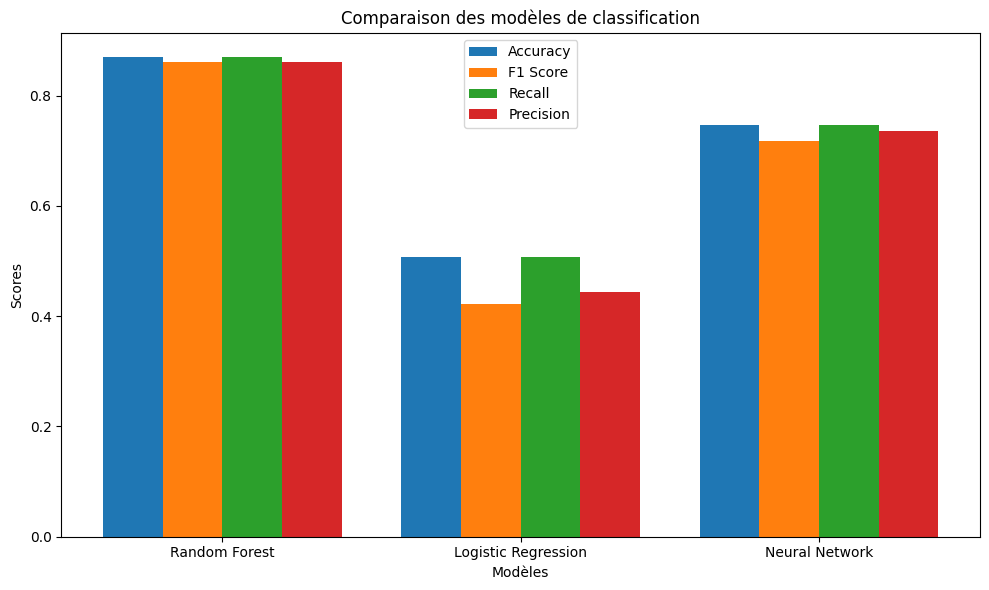

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Noms des modèles
models = ['Random Forest', 'Logistic Regression', 'Neural Network']

# Valeurs des performances
accuracy = [0.8705, 0.5065, 0.7470]
f1_score = [0.8606, 0.4214, 0.7185]
recall = [0.8705, 0.5065, 0.7470]
precision = [0.8603, 0.4437, 0.7353]

# Position des barres
x = np.arange(len(models))

# Largeur des barres
width = 0.2

# Création du graphique
fig, ax = plt.subplots(figsize=(10, 6))

# Affichage des barres pour chaque métrique
rects1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width/2, f1_score, width, label='F1 Score')
rects3 = ax.bar(x + width/2, recall, width, label='Recall')
rects4 = ax.bar(x + width*1.5, precision, width, label='Precision')

# Ajouter des labels, titres et légendes
ax.set_xlabel('Modèles')
ax.set_ylabel('Scores')
ax.set_title('Comparaison des modèles de classification')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()


**Gestion d anomalie **

In [26]:
# Cloner le DataFrame original pour travailler sur le cas d'anomalie
df_anomaly = df.copy()

# Vérifier que la copie a été effectuée correctement
print(df_anomaly.head())

   Attack category  Attack subcategory  Protocol     Source IP  Source Port  \
0                8                  72       111  175.45.176.0    -0.563963   
1                6                 133       117  175.45.176.3    -0.210614   
2                6                  50       111  175.45.176.2    -0.115634   
3                6                  93       111  175.45.176.2    -0.541353   
4                6                  55       111  175.45.176.2     0.043793   

   Destination IP  Destination Port  \
0  149.171.126.16         -0.225057   
1  149.171.126.18          3.092944   
2  149.171.126.16         -0.225057   
3  149.171.126.16          0.330480   
4  149.171.126.10         -0.225057   

                                         Attack Name  \
0  Domino Web Server Database Access: /doladmin.n...   
1  Solaris rwalld Format String Vulnerability (ht...   
2  Windows Metafile (WMF) SetAbortProc() Code Exe...   
3  HP Data Protector Backup (https://strikecenter...   
4  Cisco I

In [27]:
from sklearn.preprocessing import LabelEncoder

# Encoder les variables catégorielles dans df_anomaly
label_encoder = LabelEncoder()

categorical_columns = ['Protocol', 'Attack category', 'Attack subcategory', 'Attack Name']
for column in categorical_columns:
    df_anomaly[column] = label_encoder.fit_transform(df_anomaly[column])

# Vérifier les données après encodage
print(df_anomaly.head())


   Attack category  Attack subcategory  Protocol     Source IP  Source Port  \
0                8                  72       111  175.45.176.0    -0.563963   
1                6                 133       117  175.45.176.3    -0.210614   
2                6                  50       111  175.45.176.2    -0.115634   
3                6                  93       111  175.45.176.2    -0.541353   
4                6                  55       111  175.45.176.2     0.043793   

   Destination IP  Destination Port  Attack Name  \
0  149.171.126.16         -0.225057         1048   
1  149.171.126.18          3.092944         4758   
2  149.171.126.16         -0.225057         6488   
3  149.171.126.16          0.330480         1480   
4  149.171.126.10         -0.225057          759   

                                    Attack Reference  .                   Time  
0                                                  -  .  1421927414-1421927416  
1  CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv.

In [29]:
from sklearn.preprocessing import StandardScaler

# Normalisation des données numériques
numerical_columns = ['Source Port', 'Destination Port'] # Removed 'Source IP' and 'Destination IP'
scaler = StandardScaler()
df_anomaly[numerical_columns] = scaler.fit_transform(df_anomaly[numerical_columns])

# Vérifier les données après normalisation
print(df_anomaly.head())

   Attack category  Attack subcategory  Protocol     Source IP  Source Port  \
0                8                  72       111  175.45.176.0    -0.563963   
1                6                 133       117  175.45.176.3    -0.210614   
2                6                  50       111  175.45.176.2    -0.115634   
3                6                  93       111  175.45.176.2    -0.541353   
4                6                  55       111  175.45.176.2     0.043793   

   Destination IP  Destination Port  Attack Name  \
0  149.171.126.16         -0.225057         1048   
1  149.171.126.18          3.092944         4758   
2  149.171.126.16         -0.225057         6488   
3  149.171.126.16          0.330480         1480   
4  149.171.126.10         -0.225057          759   

                                    Attack Reference  .                   Time  
0                                                  -  .  1421927414-1421927416  
1  CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv.

In [30]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Assuming 'df_anomaly' contains your data
# Select only numerical features for Isolation Forest
numerical_features = df_anomaly.select_dtypes(include=['number']).columns
df_anomaly_numerical = df_anomaly[numerical_features]


# Apply Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.05)  # 5% of data considered as anomalies
model.fit(df_anomaly_numerical)

# Predict anomalies (1 = normal, -1 = anomaly)
predictions = model.predict(df_anomaly_numerical)

# Add the anomaly column to the cloned DataFrame
df_anomaly['Anomaly'] = predictions

# Display detected anomalies
anomalies = df_anomaly[df_anomaly['Anomaly'] == -1]
print("Anomalies détectées :")
print(anomalies)

Anomalies détectées :
       Attack category  Attack subcategory  Protocol     Source IP  \
1                    6                 133       117  175.45.176.3   
30                   8                  34         2  175.45.176.0   
44                   6                 113       111  175.45.176.3   
56                   9                  94       111  175.45.176.0   
57                   9                  89       117  175.45.176.1   
...                ...                 ...       ...           ...   
19338                2                  17       117  175.45.176.3   
20498                5                  35         0  175.45.176.0   
20507                6                   1         0  175.45.176.0   
20509                6                   9         0  175.45.176.0   
20953                2                  47       111  175.45.176.3   

       Source Port  Destination IP  Destination Port  Attack Name  \
1        -0.210614  149.171.126.18          3.092944         4758   